In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_columns', None)
df_train = pd.read_csv("/content/train.csv", index_col="id")
df_test = pd.read_csv("/content/test.csv", index_col="id")

df_test.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
id,,,,,,,,,,,,,,,,,,,
1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House


In [81]:
print(f"Training dataset shape: {df_train.shape}")
print(f"Testing dataset shape: {df_test.shape}")

Training dataset shape: (1200000, 20)
Testing dataset shape: (800000, 19)


In [82]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200000 entries, 0 to 1199999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1181295 non-null  float64
 1   Gender                1200000 non-null  object 
 2   Annual Income         1155051 non-null  float64
 3   Marital Status        1181471 non-null  object 
 4   Number of Dependents  1090328 non-null  float64
 5   Education Level       1200000 non-null  object 
 6   Occupation            841925 non-null   object 
 7   Health Score          1125924 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Previous Claims       835971 non-null   float64
 11  Vehicle Age           1199994 non-null  float64
 12  Credit Score          1062118 non-null  float64
 13  Insurance Duration    1199999 non-null  float64
 14  Policy Start Date     1200000 non-null 

In [83]:
def missing_val_percentage(df):

    # Calculate percentage of missing values
    missing_percentage = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({
        'column_name': df.columns,
        'percent_missing': missing_percentage
    })

    # Sort values by percentage missing in descending order
    missing_value_df.sort_values("percent_missing", inplace=True, ascending=False)

    # Reset index and drop the old one
    missing_value_df.reset_index(drop=True, inplace=True)

    # Display the resulting dataframe
    print(missing_value_df)

# Example usage
missing_val_percentage(df_train)


             column_name  percent_missing
0        Previous Claims        30.335750
1             Occupation        29.839583
2           Credit Score        11.490167
3   Number of Dependents         9.139333
4      Customer Feedback         6.485333
5           Health Score         6.173000
6          Annual Income         3.745750
7                    Age         1.558750
8         Marital Status         1.544083
9            Vehicle Age         0.000500
10    Insurance Duration         0.000083
11              Location         0.000000
12           Policy Type         0.000000
13                Gender         0.000000
14       Education Level         0.000000
15     Policy Start Date         0.000000
16        Smoking Status         0.000000
17    Exercise Frequency         0.000000
18         Property Type         0.000000
19        Premium Amount         0.000000


In [84]:
missing_val_percentage(df_test)

             column_name  percent_missing
0        Previous Claims        30.350250
1             Occupation        29.890625
2           Credit Score        11.431375
3   Number of Dependents         9.141250
4      Customer Feedback         6.534500
5           Health Score         6.181125
6          Annual Income         3.732500
7                    Age         1.561125
8         Marital Status         1.542000
9            Vehicle Age         0.000375
10    Insurance Duration         0.000250
11     Policy Start Date         0.000000
12    Exercise Frequency         0.000000
13        Smoking Status         0.000000
14           Policy Type         0.000000
15                Gender         0.000000
16              Location         0.000000
17       Education Level         0.000000
18         Property Type         0.000000


Handling Missing Values

In [85]:
# for df in [df_train , df_test]:
#   df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'])

In [86]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

def differentiate_cols(df, date_col=["Policy Start Date"]):
    numeric_columns = df.select_dtypes(include="number").columns.tolist()
    categorical_cols = df.select_dtypes(exclude="number").columns
    categorical_cols = [col for col in categorical_cols if col not in date_col]
    return numeric_columns, categorical_cols

numeric_columns, categorical_cols = differentiate_cols(df_train)

In [87]:
numeric_columns

['Age',
 'Annual Income',
 'Number of Dependents',
 'Health Score',
 'Previous Claims',
 'Vehicle Age',
 'Credit Score',
 'Insurance Duration',
 'Premium Amount']

In [88]:
categorical_cols

['Gender',
 'Marital Status',
 'Education Level',
 'Occupation',
 'Location',
 'Policy Type',
 'Customer Feedback',
 'Smoking Status',
 'Exercise Frequency',
 'Property Type']

In [51]:
# fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(10, 20), sharex=False)
# for ax, col in zip(axes, numeric_columns):
#     sns.histplot(data=df_train, x=col, kde=True, bins=30, ax=ax)
#     ax.set_title(f'Distribution of {col}')

# plt.tight_layout()
# plt.show()

Everything looks normally distrbuted except for Premium Amount which quite skewed to the right (positively skewed). We can do the skew test to find out the skewness of the column. If it is normally distributed , the score should be about zero

In [89]:
from scipy.stats import skew

def skew_test(cols , df):
  skew_df = pd.DataFrame({
      "Columns": cols,
      "Skewness_score": [skew(df[col], nan_policy="omit") for col in cols]
  })

  print(skew_df)

skew_test(numeric_columns , df_train)

                Columns  Skewness_score
0                   Age       -0.012532
1         Annual Income        1.470356
2  Number of Dependents       -0.013255
3          Health Score        0.282187
4       Previous Claims        0.905319
5           Vehicle Age       -0.020409
6          Credit Score       -0.113572
7    Insurance Duration       -0.008793
8        Premium Amount        1.240914


Annual Income , Previous Claims and Premium Amount are positevely skewed and hence need to be handle to normalise the distibution.

- Lets apply box-cox transformation to the three columns

In [90]:
from scipy.stats import boxcox
import numpy as np

# Ensure no NaNs exist in both datasets for the selected columns
nan_cols = ["Annual Income", "Previous Claims"]
for col in nan_cols:
    mean_value = df_train[col].mean()  # Calculate mean from the training set
    df_train[col].fillna(mean_value, inplace=True)
    df_test[col].fillna(mean_value, inplace=True)

# Function to apply Box-Cox transformation
def box_cox_transform(train, test, cols):
    for col in cols:
        # Add a small constant to avoid issues with non-positive values
        train[col], fitted_lambda = boxcox(train[col] + 1e-6)
        test[col] = boxcox(test[col] + 1e-6, lmbda=fitted_lambda)  # Use the same lambda for the test set

        # Print the skewness after transformation
        train_skewness = skew(train[col], nan_policy="omit")
        test_skewness = skew(test[col], nan_policy="omit")
        print(f"New Skewness of {col}:")
        print(f"Train: {train_skewness}")
        print(f"Test: {test_skewness}")
        print()

# Columns to apply Box-Cox transformation
cols_to_transform = ["Annual Income", "Previous Claims"]

# Apply transformation to both train and test datasets
box_cox_transform(df_train, df_test, cols_to_transform)



<ipython-input-90-c6715050e762>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[col].fillna(mean_value, inplace=True)
<ipython-input-90-c6715050e762>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

New Skewness of Annual Income:
Train: -0.07940009688797713
Test: -0.08148809595199755

New Skewness of Previous Claims:
Train: -0.9941030385090366
Test: -0.999599922826488



In [91]:
def box_cox(li):
  for col in li:
    df_train[col],_ = boxcox(df_train[col] + 1e-6)
    skewness = skew(df_train[col] , nan_policy="omit")
    print(f"New Skewness of {col}")
    print(skewness)
    print()


li = ["Premium Amount"]
box_cox(li)


New Skewness of Premium Amount
-0.0584046595000076



Skewness issue has been resolved

In [55]:
# for col in categorical_cols:
#   plt.figure(figsize=(4,3))
#   sns.countplot(x=col , data = df_train[categorical_cols])
#   plt.title(f'{col}')
#   plt.show()

All data seems to be balanced here which is a good thing.

In [92]:
df_test.head(3)

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
id,,,,,,,,,,,,,,,,,,,
1200000,28.0,Female,28.765613,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,0.002687,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1200001,31.0,Female,98.341860,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,0.002687,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
1200002,47.0,Female,53.848206,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,0.002687,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo


In [93]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200000 entries, 0 to 1199999
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Age                   1181295 non-null  float64
 1   Gender                1200000 non-null  object 
 2   Annual Income         1200000 non-null  float64
 3   Marital Status        1181471 non-null  object 
 4   Number of Dependents  1090328 non-null  float64
 5   Education Level       1200000 non-null  object 
 6   Occupation            841925 non-null   object 
 7   Health Score          1125924 non-null  float64
 8   Location              1200000 non-null  object 
 9   Policy Type           1200000 non-null  object 
 10  Previous Claims       1200000 non-null  float64
 11  Vehicle Age           1199994 non-null  float64
 12  Credit Score          1062118 non-null  float64
 13  Insurance Duration    1199999 non-null  float64
 14  Policy Start Date     1200000 non-null 

🛠️ Handle Missing Values & Preprocessing Pipeline

In [94]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler , OneHotEncoder, OrdinalEncoder

target_column = "Premium Amount"
X_train = df_train.drop(columns = [target_column])
y_train = df_train[target_column]

numeric_columns, categorical_columns = differentiate_cols(X_train)

# Columns for one-hot and ordinal encoding
one_hot = ["Gender", "Marital Status", "Occupation", "Location", "Smoking Status", "Exercise Frequency", "Property Type"]
ordinal = ["Education Level", "Policy Type", "Customer Feedback"]

# Define orders for ordinal columns
education_order = ["Bachelor's", "Master's", 'High School', 'PhD']
policy_order = ['Basic', 'Comprehensive', 'Premium']
customer_order = ['Poor', 'Average', 'Good']

# Imputers
simp_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
mode_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Scaling
scaler = StandardScaler()

# Encoders
one_hot_encoder = OneHotEncoder(drop="first", sparse_output=False)
ordinal_encoder = OrdinalEncoder(categories=[education_order, policy_order, customer_order])

# Preprocessing pipelines
numeric_pipeline = Pipeline([
    ("imputer", simp_imputer),
    ("scaler", scaler)
])

categorical_pipeline = Pipeline([
    ("imputer", mode_imputer),
    ("onehot", one_hot_encoder)
])

ordinal_pipeline = Pipeline([
    ("imputer", mode_imputer),
    ("ordinal", OrdinalEncoder(categories=[education_order, policy_order, customer_order]))
])

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, numeric_columns),
        ("cat", categorical_pipeline, one_hot),
        ("ord", ordinal_pipeline, ordinal)
    ],
    remainder="passthrough"  # Keep datetime columns as-is
)

# Fit on train and transform both train and test
preprocessor.fit(X_train)

# Apply transformations to train and test
df_train_processed = pd.DataFrame(preprocessor.transform(X_train), columns=preprocessor.get_feature_names_out())
df_test_processed = pd.DataFrame(preprocessor.transform(df_test), columns=preprocessor.get_feature_names_out())

df_train_processed.head()

,num__Age,num__Annual Income,num__Number of Dependents,num__Health Score,num__Previous Claims,num__Vehicle Age,num__Credit Score,num__Insurance Duration,cat__Gender_Male,cat__Marital Status_Married,cat__Marital Status_Single,cat__Occupation_Self-Employed,cat__Occupation_Unemployed,cat__Location_Suburban,cat__Location_Urban,cat__Smoking Status_Yes,cat__Exercise Frequency_Monthly,cat__Exercise Frequency_Rarely,cat__Exercise Frequency_Weekly,cat__Property Type_Condo,cat__Property Type_House,ord__Education Level,ord__Policy Type,ord__Customer Feedback,remainder__Policy Start Date
0,-1.648471,-0.628238,-0.747535,-0.255071,0.840285,1.286338,-1.565702,-0.007023,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,2023-12-23 15:21:39.134960
1,-0.159711,0.320957,0.73283,-0.849704,0.452436,0.420713,0.716328,-1.163391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2023-06-12 15:21:39.111551
2,-1.350719,0.120452,0.73283,1.824212,0.452436,0.766963,-0.0,-0.777935,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,2.0,2023-09-30 15:21:39.221386
3,-1.499595,2.140173,-0.007353,-1.241521,0.452436,-1.656787,-1.601137,-1.548847,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024-06-12 15:21:39.226954
4,-1.499595,0.546053,-0.747535,-0.443102,-1.680748,-0.271787,0.035971,-0.392479,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,2021-12-01 15:21:39.252145


In [95]:
df_test_processed.head(3)

,num__Age,num__Annual Income,num__Number of Dependents,num__Health Score,num__Previous Claims,num__Vehicle Age,num__Credit Score,num__Insurance Duration,cat__Gender_Male,cat__Marital Status_Married,cat__Marital Status_Single,cat__Occupation_Self-Employed,cat__Occupation_Unemployed,cat__Location_Suburban,cat__Location_Urban,cat__Smoking Status_Yes,cat__Exercise Frequency_Monthly,cat__Exercise Frequency_Rarely,cat__Exercise Frequency_Weekly,cat__Property Type_Condo,cat__Property Type_House,ord__Education Level,ord__Policy Type,ord__Customer Feedback,remainder__Policy Start Date
0,-0.978529,-1.464845,1.473012,-1.519011,0.453821,1.632588,-0.0,-1.548847,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2023-06-04 15:21:39.245086
1,-0.755215,1.966468,-0.007353,-1.034831,0.453821,0.766963,-1.565702,1.149346,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0,2024-04-22 15:21:39.224915
2,0.435792,-0.227839,-1.487718,-0.106539,0.453821,1.113213,1.602209,1.534802,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,3.0,1.0,1.0,2023-04-05 15:21:39.134960


In [96]:
df_train_processed.dtypes

,0
num__Age,object
num__Annual Income,object
num__Number of Dependents,object
num__Health Score,object
num__Previous Claims,object
num__Vehicle Age,object
num__Credit Score,object
num__Insurance Duration,object
cat__Gender_Male,object
cat__Marital Status_Married,object


In [97]:
for df in [df_train_processed , df_test_processed]:
  # Convert columns with the 'num__' prefix to numeric
  num_cols = [col for col in df.columns if col.startswith('num__')]

  # Apply conversion
  df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')



In [98]:
df_test_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   num__Age                         800000 non-null  float64
 1   num__Annual Income               800000 non-null  float64
 2   num__Number of Dependents        800000 non-null  float64
 3   num__Health Score                800000 non-null  float64
 4   num__Previous Claims             800000 non-null  float64
 5   num__Vehicle Age                 800000 non-null  float64
 6   num__Credit Score                800000 non-null  float64
 7   num__Insurance Duration          800000 non-null  float64
 8   cat__Gender_Male                 800000 non-null  object 
 9   cat__Marital Status_Married      800000 non-null  object 
 10  cat__Marital Status_Single       800000 non-null  object 
 11  cat__Occupation_Self-Employed    800000 non-null  object 
 12  ca

In [99]:
df_train_processed.isnull().sum()

,0
num__Age,0
num__Annual Income,0
num__Number of Dependents,0
num__Health Score,0
num__Previous Claims,0
num__Vehicle Age,0
num__Credit Score,0
num__Insurance Duration,0
cat__Gender_Male,0
cat__Marital Status_Married,0


In [100]:
for df in [df_train_processed , df_test_processed]:
  df.rename(columns={"remainder__Policy Start Date" : "Policy Start Date"}, inplace=True)
  df[["Policy Start Date"]] = df[["Policy Start Date"]].apply(pd.to_datetime)

Handling DATE column

In [101]:
def date(df):

  for col in df.columns:
    df["Year"] = df["Policy Start Date"].dt.year
    df["Month"] = df["Policy Start Date"].dt.month
    df["Day"] = df["Policy Start Date"].dt.day

    min_year = df["Year"].min()
    max_year = df["Year"].max()
    df['Year_sin'] = np.sin(2 * np.pi * (df['Year'] - min_year) / (max_year - min_year))
    df['Year_cos'] = np.cos(2 * np.pi * (df['Year'] - min_year) / (max_year - min_year))
    df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
    df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
    df['Day_sin'] = np.sin(2 * np.pi * df['Day'] / 31)
    df['Day_cos'] = np.cos(2 * np.pi * df['Day'] / 31)
    df['Group']=(df['Year']-2020)*48+df['Month']*4+df['Day']//7

    df.drop('Policy Start Date', axis=1, inplace=True)

    return df

date(df_train_processed)
date(df_test_processed)


,num__Age,num__Annual Income,num__Number of Dependents,num__Health Score,num__Previous Claims,num__Vehicle Age,num__Credit Score,num__Insurance Duration,cat__Gender_Male,cat__Marital Status_Married,cat__Marital Status_Single,cat__Occupation_Self-Employed,cat__Occupation_Unemployed,cat__Location_Suburban,cat__Location_Urban,cat__Smoking Status_Yes,cat__Exercise Frequency_Monthly,cat__Exercise Frequency_Rarely,cat__Exercise Frequency_Weekly,cat__Property Type_Condo,cat__Property Type_House,ord__Education Level,ord__Policy Type,ord__Customer Feedback,Year,Month,Day,Year_sin,Year_cos,Month_sin,Month_cos,Day_sin,Day_cos,Group
0,-9.785291e-01,-1.464845,1.473012,-1.519011,0.453821,1.632588,-1.611408e-15,-1.548847,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2023,6,4,-9.510565e-01,0.309017,1.224647e-16,-1.000000e+00,0.724793,0.688967,168
1,-7.552152e-01,1.966468,-0.007353,-1.034831,0.453821,0.766963,-1.565702e+00,1.149346,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0,2024,4,22,-2.449294e-16,1.000000,8.660254e-01,-5.000000e-01,-0.968077,-0.250653,211
2,4.357924e-01,-0.227839,-1.487718,-0.106539,0.453821,1.113213,1.602209e+00,1.534802,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,3.0,1.0,1.0,2023,4,5,-9.510565e-01,0.309017,8.660254e-01,-5.000000e-01,0.848644,0.528964,160
3,-9.785291e-01,0.281978,0.732830,-1.732344,0.452436,-1.137412,1.254944e+00,-0.007023,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,2023,10,25,-9.510565e-01,0.309017,-8.660254e-01,5.000000e-01,-0.937752,0.347305,187
4,-1.276281e+00,-0.573277,-0.007353,-1.164875,0.453821,0.766963,1.148638e+00,0.763889,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,1.0,2021,11,26,5.877853e-01,-0.809017,-5.000000e-01,8.660254e-01,-0.848644,0.528964,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,6.591064e-01,0.523182,-0.747535,-0.940315,0.453821,-0.271787,-2.012186e+00,-1.163391,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,2021,7,9,5.877853e-01,-0.809017,-5.000000e-01,-8.660254e-01,0.968077,-0.250653,77
799996,2.115655e-15,1.244628,-1.487718,-1.477748,0.840285,-1.656787,-1.611408e-15,-1.163391,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2023,3,28,-9.510565e-01,0.309017,1.000000e+00,6.123234e-17,-0.571268,0.820763,160
799997,-1.127405e+00,0.424230,-1.487718,-1.605418,0.453821,0.074463,-1.611408e-15,0.378433,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2019,9,30,0.000000e+00,1.000000,-1.000000e+00,-1.836970e-16,-0.201299,0.979530,-8
799998,-5.319013e-01,0.695181,0.732830,-0.818613,0.840285,1.286338,-8.924321e-01,0.763889,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,2022,5,9,-5.877853e-01,-0.809017,5.000000e-01,-8.660254e-01,0.968077,-0.250653,117


In [102]:
for df in [df_train_processed,df_test_processed]:
  df.drop(columns=['Group', 'Year', 'Month', 'Day'], axis=1, inplace=True)

Further Feature Engineering

In [103]:
# def age_bin(df):
#     bins = [17, 25, 35, 45, 55, 65]
#     labels = ["18-24", "25-34", "35-44", "45-54", "55-64"]

#     df["Age_bin"] = pd.cut(df["Age"], bins=bins, labels=labels)

#     age_encoder = OrdinalEncoder(categories=[labels])
#     df["Age_encoded"] = age_encoder.fit_transform(df[["Age_bin"]])

def Age_Income_Interaction(df):
    df["Age_Income_Interaction"] = df["num__Age"] * df["num__Annual Income"]

# Apply the functions
# age_bin(df_train)
Age_Income_Interaction(df_train_processed)
Age_Income_Interaction(df_test_processed)

df_test_processed.head(2)


,num__Age,num__Annual Income,num__Number of Dependents,num__Health Score,num__Previous Claims,num__Vehicle Age,num__Credit Score,num__Insurance Duration,cat__Gender_Male,cat__Marital Status_Married,cat__Marital Status_Single,cat__Occupation_Self-Employed,cat__Occupation_Unemployed,cat__Location_Suburban,cat__Location_Urban,cat__Smoking Status_Yes,cat__Exercise Frequency_Monthly,cat__Exercise Frequency_Rarely,cat__Exercise Frequency_Weekly,cat__Property Type_Condo,cat__Property Type_House,ord__Education Level,ord__Policy Type,ord__Customer Feedback,Year_sin,Year_cos,Month_sin,Month_cos,Day_sin,Day_cos,Age_Income_Interaction
0,-0.978529,-1.464845,1.473012,-1.519011,0.453821,1.632588,-1.611408e-15,-1.548847,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-9.510565e-01,0.309017,1.224647e-16,-1.0,0.724793,0.688967,1.433393
1,-0.755215,1.966468,-0.007353,-1.034831,0.453821,0.766963,-1.565702e+00,1.149346,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0,-2.449294e-16,1.000000,8.660254e-01,-0.5,-0.968077,-0.250653,-1.485106


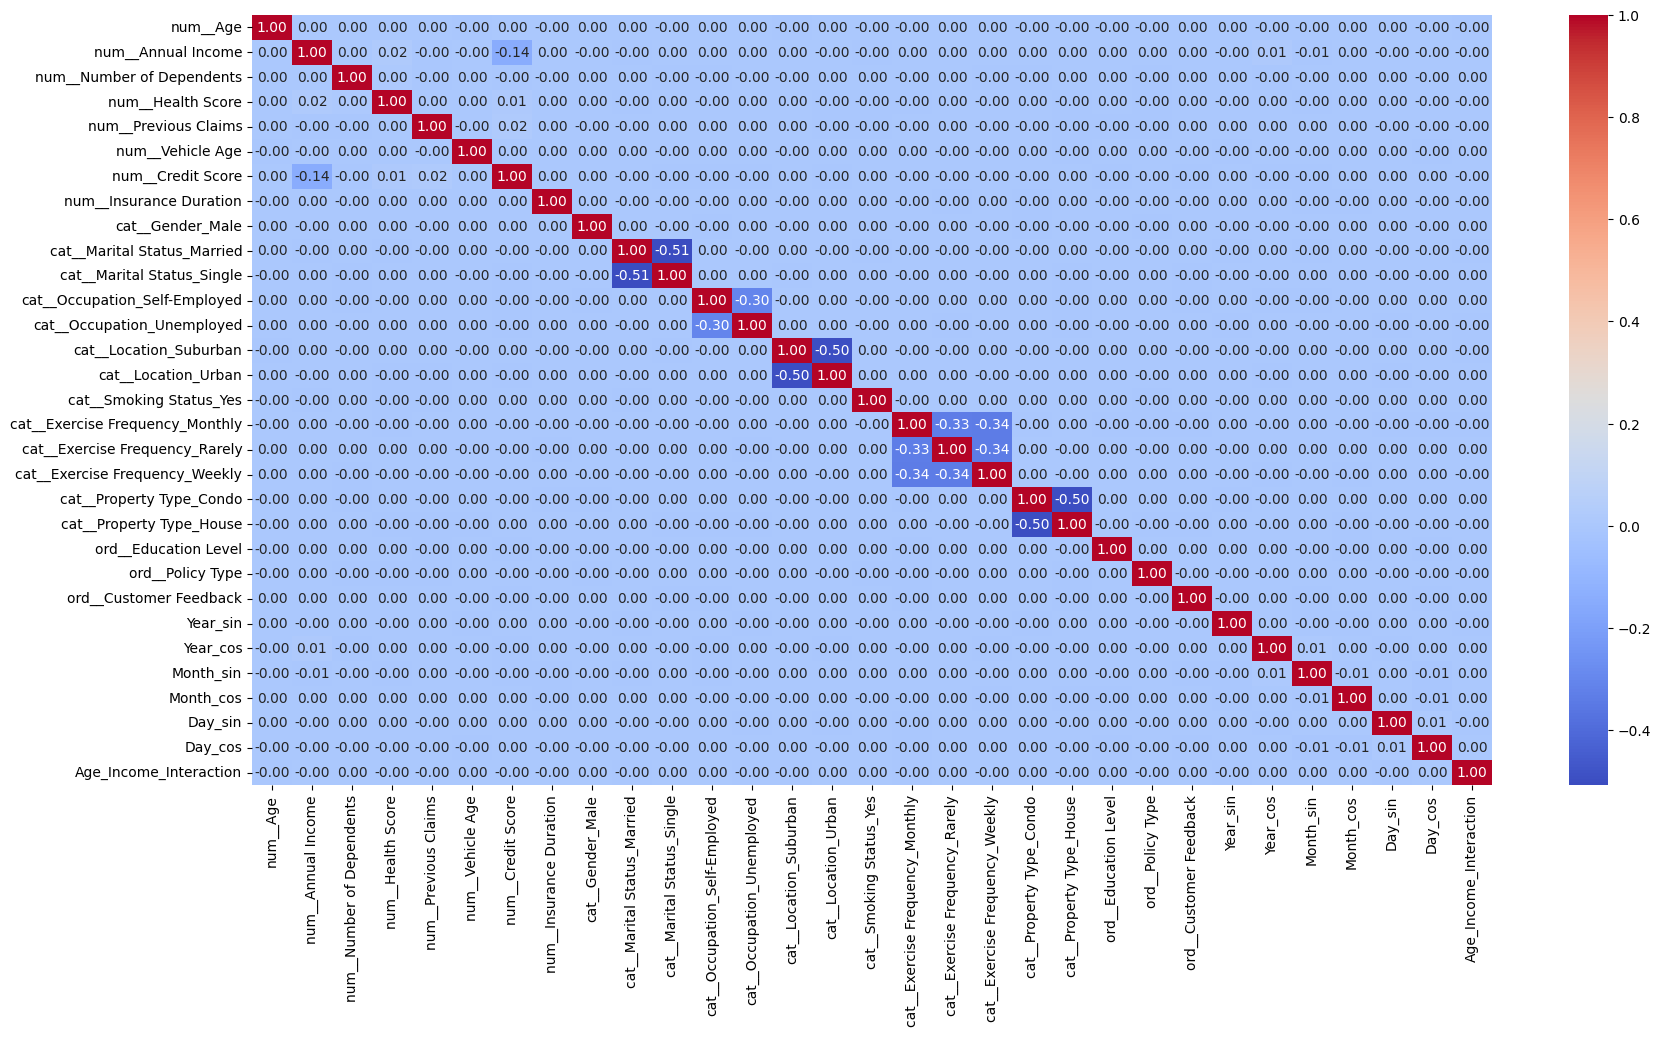

In [104]:
plt.figure(figsize=(20,10))
corr_matrix = df_train_processed.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

- No highly correlated features which is good
- Slighlt negative correlation for Annual Income and Credit score for premium amount
- As these variables decreases , premium amount also descreases


In [105]:
num , cat = differentiate_cols(df_train_processed)
print("DF TRAIN SKEW TEST :")
skew_test(num , df_train_processed)

DF TRAIN SKEW TEST :
                      Columns  Skewness_score
0                    num__Age       -0.012631
1          num__Annual Income       -0.079400
2   num__Number of Dependents       -0.013905
3           num__Health Score        0.291322
4        num__Previous Claims       -0.994103
5            num__Vehicle Age       -0.020409
6           num__Credit Score       -0.120719
7     num__Insurance Duration       -0.008793
8                    Year_sin       -0.002861
9                    Year_cos        0.029523
10                  Month_sin       -0.003057
11                  Month_cos        0.022452
12                    Day_sin       -0.007063
13                    Day_cos        0.023613
14     Age_Income_Interaction       -0.002361


In [106]:
num , cat = differentiate_cols(df_test_processed)
print("DF TRAIN SKEW TEST :")
skew_test(num , df_test_processed)

DF TRAIN SKEW TEST :
                      Columns  Skewness_score
0                    num__Age       -0.010168
1          num__Annual Income       -0.081488
2   num__Number of Dependents       -0.012952
3           num__Health Score        0.291862
4        num__Previous Claims       -0.999600
5            num__Vehicle Age       -0.019897
6           num__Credit Score       -0.121022
7     num__Insurance Duration       -0.006913
8                    Year_sin       -0.003394
9                    Year_cos        0.029968
10                  Month_sin       -0.002678
11                  Month_cos        0.024278
12                    Day_sin       -0.007068
13                    Day_cos        0.027613
14     Age_Income_Interaction       -0.002956


Let's use f-regression (univariate analysis) to initial check for best top 10 features

In [107]:
for df in [df_train_processed, df_test_processed]:
    # Identify columns
    cat_cols = [col for col in df.columns if col.startswith('cat__')]
    num_cols = [col for col in df.columns if col.startswith('ord__')]

    # Convert categorical columns to boolean (True/False)
    df[cat_cols] = df[cat_cols].apply(lambda x: x.astype(bool))

    # Convert boolean columns to numeric (1/0)
    df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')


In [108]:
df_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 31 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   num__Age                         1200000 non-null  float64
 1   num__Annual Income               1200000 non-null  float64
 2   num__Number of Dependents        1200000 non-null  float64
 3   num__Health Score                1200000 non-null  float64
 4   num__Previous Claims             1200000 non-null  float64
 5   num__Vehicle Age                 1200000 non-null  float64
 6   num__Credit Score                1200000 non-null  float64
 7   num__Insurance Duration          1200000 non-null  float64
 8   cat__Gender_Male                 1200000 non-null  bool   
 9   cat__Marital Status_Married      1200000 non-null  bool   
 10  cat__Marital Status_Single       1200000 non-null  bool   
 11  cat__Occupation_Self-Employed    1200000 non-null 

In [109]:
df_train_processed = pd.concat([df_train_processed, y_train.reset_index(drop=True)], axis=1)
df_train_processed.shape

(1200000, 32)

In [110]:
df_train_processed.head(2)

,num__Age,num__Annual Income,num__Number of Dependents,num__Health Score,num__Previous Claims,num__Vehicle Age,num__Credit Score,num__Insurance Duration,cat__Gender_Male,cat__Marital Status_Married,cat__Marital Status_Single,cat__Occupation_Self-Employed,cat__Occupation_Unemployed,cat__Location_Suburban,cat__Location_Urban,cat__Smoking Status_Yes,cat__Exercise Frequency_Monthly,cat__Exercise Frequency_Rarely,cat__Exercise Frequency_Weekly,cat__Property Type_Condo,cat__Property Type_House,ord__Education Level,ord__Policy Type,ord__Customer Feedback,Year_sin,Year_cos,Month_sin,Month_cos,Day_sin,Day_cos,Age_Income_Interaction,Premium Amount
0,-1.648471,-0.628238,-0.747535,-0.255071,0.840285,1.286338,-1.565702,-0.007023,False,True,False,True,False,False,True,False,False,False,True,False,True,0.0,2.0,0.0,-0.951057,0.309017,-2.449294e-16,1.0,-0.998717,-0.050649,1.035631,57.641855
1,-0.159711,0.320957,0.732830,-0.849704,0.452436,0.420713,0.716328,-1.163391,False,False,False,False,False,False,False,True,True,False,False,False,True,1.0,1.0,1.0,-0.951057,0.309017,1.224647e-16,-1.0,0.651372,-0.758758,-0.051261,43.711564


In [111]:
from sklearn.feature_selection import SelectKBest, f_regression

X = df_train_processed.drop(columns=["Premium Amount"])
y = df_train_processed["Premium Amount"]


# Use f_regression for regression tasks
selector = SelectKBest(f_regression, k=10)  # Select top 10 features
X_selected = selector.fit_transform(X, y)
selected_columns = X.columns[selector.get_support()]
print("Selected Features:", selected_columns)

Selected Features: Index(['num__Age', 'num__Annual Income', 'num__Health Score',
       'num__Previous Claims', 'num__Credit Score',
       'cat__Marital Status_Single', 'Year_cos', 'Month_sin', 'Month_cos',
       'Age_Income_Interaction'],
      dtype='object')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077362 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1239
[LightGBM] [Info] Number of data points in the train set: 960000, number of used features: 31
[LightGBM] [Info] Start training from score 35.231842


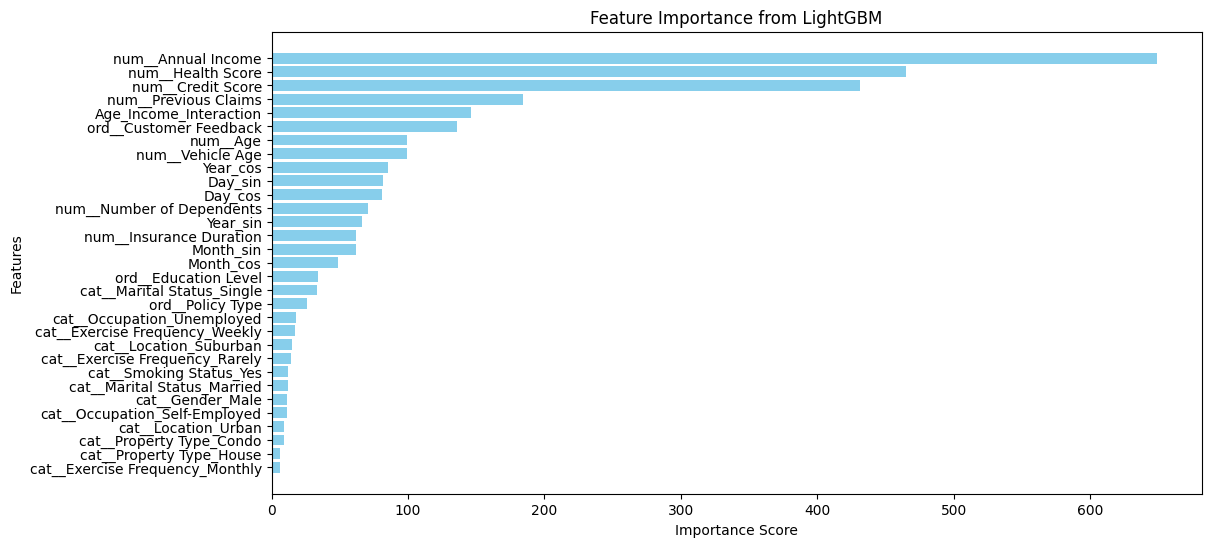

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1142
[LightGBM] [Info] Number of data points in the train set: 960000, number of used features: 13
[LightGBM] [Info] Start training from score 35.231842
Selected Features (Combined): ['num__Credit Score', 'Month_cos', 'Month_sin', 'Age_Income_Interaction', 'cat__Marital Status_Single', 'num__Number of Dependents', 'num__Age', 'num__Previous Claims', 'Year_sin', 'Day_cos', 'num__Health Score', 'Year_cos', 'num__Annual Income']
Mean Absolute Error (MAE): 9.9803
Root Mean Squared Error (RMSE): 12.9715
Root Mean Squared Logarithmic Error (RMSLE): 0.4634
R-squared (R²): 0.0638


In [112]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data
X = df_train_processed.drop(columns=["Premium Amount"])
y = df_train_processed["Premium Amount"]

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 1: FEATURE IMPORTANCE FROM LIGHTGBM
# Define and fit the LightGBM model
model = lgb.LGBMRegressor(learning_rate=0.09, max_depth=-1, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Visualize feature importances
plt.figure(figsize=(12, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.gca().invert_yaxis()  # Reverse order for better readability
plt.title("Feature Importance from LightGBM")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# Select top features based on importance
top_tree_features = importance_df["Feature"][:18]

# STEP 2: UNIVARIATE ANALYSIS WITH SelectKBest
selector = SelectKBest(f_regression, k=18)  # Select top 18 features
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the selected features
top_univariate_features = X_train.columns[selector.get_support()]

# STEP 3: Combine features found in both analyses
combined_selected_features = list(set(top_tree_features) & set(top_univariate_features))

# STEP 4: Select the final features for training the model
X_train_final = X_train[combined_selected_features]
X_val_final = X_val[combined_selected_features]  # Apply the same feature selection to validation set

# Train the final model with selected features
final_model = lgb.LGBMRegressor(learning_rate=0.09, max_depth=-1, random_state=42)
final_model.fit(X_train_final, y_train)

# Print selected features
print(f"Selected Features (Combined): {combined_selected_features}")

# Evaluate model performance
y_pred = final_model.predict(X_val_final)

# Logarithmic metrics: Ensure non-negative values for log transformations
y_val_safe = np.maximum(y_val, 1e-6)
y_pred_safe = np.maximum(y_pred, 1e-6)

# Metrics
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
y_val_log = np.log1p(y_val_safe)
y_pred_log = np.log1p(y_pred_safe)
rmsle = np.sqrt(mean_squared_error(y_val_log, y_pred_log))
r2 = r2_score(y_val, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.4f}")
print(f"R-squared (R²): {r2:.4f}")


In [113]:
# Ensure test data uses the selected features
X_test_final = df_test_processed[combined_selected_features]  # Use features from the final model

# Generate predictions
test_predictions = final_model.predict(X_test_final)

In [114]:
df_test_processed.head()

,num__Age,num__Annual Income,num__Number of Dependents,num__Health Score,num__Previous Claims,num__Vehicle Age,num__Credit Score,num__Insurance Duration,cat__Gender_Male,cat__Marital Status_Married,cat__Marital Status_Single,cat__Occupation_Self-Employed,cat__Occupation_Unemployed,cat__Location_Suburban,cat__Location_Urban,cat__Smoking Status_Yes,cat__Exercise Frequency_Monthly,cat__Exercise Frequency_Rarely,cat__Exercise Frequency_Weekly,cat__Property Type_Condo,cat__Property Type_House,ord__Education Level,ord__Policy Type,ord__Customer Feedback,Year_sin,Year_cos,Month_sin,Month_cos,Day_sin,Day_cos,Age_Income_Interaction
0,-0.978529,-1.464845,1.473012,-1.519011,0.453821,1.632588,-1.611408e-15,-1.548847,False,False,True,True,False,False,False,True,False,False,True,False,True,0.0,0.0,0.0,-9.510565e-01,0.309017,1.224647e-16,-1.000000,0.724793,0.688967,1.433393
1,-0.755215,1.966468,-0.007353,-1.034831,0.453821,0.766963,-1.565702e+00,1.149346,False,True,False,True,False,True,False,True,False,True,False,False,False,1.0,2.0,2.0,-2.449294e-16,1.000000,8.660254e-01,-0.500000,-0.968077,-0.250653,-1.485106
2,0.435792,-0.227839,-1.487718,-0.106539,0.453821,1.113213,1.602209e+00,1.534802,False,False,False,False,True,False,True,True,True,False,False,True,False,3.0,1.0,1.0,-9.510565e-01,0.309017,8.660254e-01,-0.500000,0.848644,0.528964,-0.099291
3,-0.978529,0.281978,0.732830,-1.732344,0.452436,-1.137412,1.254944e+00,-0.007023,False,False,False,True,False,True,False,True,False,False,False,False,True,3.0,1.0,0.0,-9.510565e-01,0.309017,-8.660254e-01,0.500000,-0.937752,0.347305,-0.275924
4,-1.276281,-0.573277,-0.007353,-1.164875,0.453821,0.766963,1.148638e+00,0.763889,True,False,False,False,True,True,False,False,False,False,True,False,True,2.0,2.0,1.0,5.877853e-01,-0.809017,-5.000000e-01,0.866025,-0.848644,0.528964,0.731662


In [119]:
submission = pd.DataFrame({
    "id": df_test_processed.index + 1200000,  # assuming 'id' starts from 1200000
    "Premium Amount": test_predictions
})

# Save the submission file
submission['id'] = submission['id'].astype(int)  # Ensure it's an integer
submission.to_csv("submission.csv", index=False)

# Print confirmation
print("Submission file created: submission.csv")

Submission file created: submission.csv


In [120]:
submission.head(2)

,id,Premium Amount
0,1200000,37.055354
1,1200001,36.096935


In [116]:
sample = pd.read_csv("/content/sample_submission.csv")
sample.head()

,id,Premium Amount
0,1200000,1102.545
1,1200001,1102.545
2,1200002,1102.545
3,1200003,1102.545
4,1200004,1102.545
